# 关联规则分析算法说明

- 关联分析：
    - 在大规模数据集中寻找有意义的关系，包含两个过程：
        - 找出：频繁项集（Frequent Item Sets）：
            - 出现次数比较多的数据项（物品）的集合；
            - 项集：一个或者多个数据项的集合（物品的集合）；
            - 项集的大小机会项集中数据项的个数。
        - 再从频繁项集中找出：关联规则（Association Rules）：
            - 两个数据项（物品）之间的关系

- 关联分析的特点：
    - 适合大数据样本；
    - 但是在大数据样本下，速度比较慢；

# 关联分析的实现思路
- 关联分析引入了两个量来度量频繁度与关联度：

## 支持度
- 频繁度的度量-支持度（Support）：
    - 就是已知数据项同时出现的频率；（先验概率）
    - 数据集中包含数据项的比例 = $\dfrac{\text{数据项数量}}{\text{总得样本数量}}$。
        - 一个数据项构成的项集的情况：$\dfrac{\text{数据项1的数量}}{\text{总得样本数量}}$。
        - 多个数据项的构成的项集情况：$\dfrac{\text{(数据项1，}\cdots \text{，数据项n)的数量}}{\text{总得样本数量}}$。


## 置信度
- 关联度的度量-置信度（Confidence）：
        - 就是条件概率：数据项1出现的情况下，数据项2出现的条件概率；
        - P(数据项1 | 数据项2) = $\dfrac{ P(\text{数据项1}, \text{数据项2}) } {P(\text{数据项2})}$
        

## 支持度与置信度的理解例子

- 使用著名的豆奶尿布说明支持度与置信度的概念：


交易流水号 | 商品
-|- 
01|豆奶，莴苣
02|莴苣，尿布，葡萄酒，甜菜
03|豆奶，尿布，葡萄酒，橙汁
04|莴苣，豆奶，尿布，葡萄酒
05|莴苣，豆奶，尿布，橙汁

1. 支持度：
    - 豆奶的支持度：$P(豆奶) = \dfrac{4}{5}$
    - (豆奶，尿布)的支持度 = $P(豆奶，尿布) = \dfrac{3}{5} = P(豆奶|尿布)  \times  P(尿布) = \dfrac{3}{4} \times \dfrac{4}{5}$

2. 置信度：
    -  (葡萄酒，尿布)的置信度 = $P(葡萄酒 | 尿布) = \dfrac{3}{4} = P(\text{葡萄酒,尿布}) / P(尿布) = \dfrac{\dfrac{3}{5}}{\dfrac{4}{5}} = \dfrac{3}{4}$

3. 支持度与置信度公式：
    - 联合概率：$P(X, Y)$
    - 条件概率：$P(X | Y) = \dfrac{P(X,Y)}{P(Y)}$

# 寻找最大频繁项集的算法

## 频繁项集的算法

- 频繁项集的寻找算法：
    - 假设$k=1$, 有一个大小为$N_k$的**数据集合**$S_k$，并:
        1. 构建一个$k$个项组成的**备选项集**的列表$C_k$；
        2. 计算每个备选项集的**支持度**；
        3. 根据支持度，保留频繁的项集,得到**保留项集**列表$L_k$；
        4. $k = k + 1$，使用保留项集列表，构建**数据集合**$S_k$，并继续第1步。
        
    - 算法$M$次循环结束，得到$M$个保留项集列表$\{L_1, L_2,\cdots, L_M\}$

- 寻找最大频繁项集核心包含三个：
    - 构建**备选项集**列表；
    - 计算每个备选项集的**支持度**；
    - 根据支持选取的项集的标准，生成**保留项集**列表；


- 豆奶与尿布的频繁集经典说明
    - 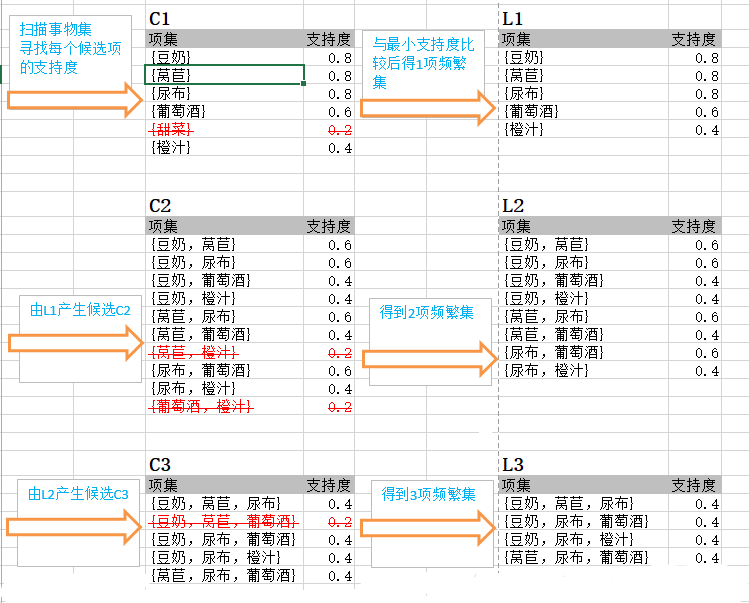

## 频繁项集算法实现

### 构建备选项集列表

1. 原始数据集

In [87]:
import numpy as np
# 准备数据集
data =  np.array([
    ['豆奶', '莴苣'],
    ['莴苣', '尿布', '葡萄酒', '甜菜'],
    ['豆奶', '尿布', '葡萄酒', '橙汁'],
    ['莴苣', '豆奶', '尿布', '葡萄酒'],
    ['莴苣', '豆奶', '尿布', '橙汁']
])

2. 构建数据集合

In [88]:
S = set()
for item in data:
    S = S | frozenset(item)

print(S)

{'莴苣', '豆奶', '甜菜', '尿布', '橙汁', '葡萄酒'}


3. 构建备选项集列表

- 从数据集合构建

In [89]:
C_1 = []    # 备选项集列表
for s in S:
    C_1.append(frozenset([s]))
C_1

[frozenset({'莴苣'}),
 frozenset({'豆奶'}),
 frozenset({'甜菜'}),
 frozenset({'尿布'}),
 frozenset({'橙汁'}),
 frozenset({'葡萄酒'})]

- 从项集列表提升构建
    - 为什么要从已有项集列表产生新的项集列表？
        - 如果被抛弃的项集支持度最低，则任何包含这个项集的项集的支持度也会是最低的，也是被抛弃对象。
    - 提升构建就是从大小为$k$的项集列表提升为$k+1$的项集列表。

- 从1到2的情况

In [90]:
# 要构建的长度为2备选项集列表
C_2 = []
# 不是从集合构建，而是从已有频繁项集列表中构建。
# 从C_1中两两组合
len_C = len(C_1)
for i in range(len_C):
    for j in range(i+1, len_C):
        C_2.append(C_1[i] | C_1[j])

C_2

[frozenset({'莴苣', '豆奶'}),
 frozenset({'甜菜', '莴苣'}),
 frozenset({'尿布', '莴苣'}),
 frozenset({'橙汁', '莴苣'}),
 frozenset({'莴苣', '葡萄酒'}),
 frozenset({'甜菜', '豆奶'}),
 frozenset({'尿布', '豆奶'}),
 frozenset({'橙汁', '豆奶'}),
 frozenset({'葡萄酒', '豆奶'}),
 frozenset({'尿布', '甜菜'}),
 frozenset({'橙汁', '甜菜'}),
 frozenset({'甜菜', '葡萄酒'}),
 frozenset({'尿布', '橙汁'}),
 frozenset({'尿布', '葡萄酒'}),
 frozenset({'橙汁', '葡萄酒'})]

- 从2到3的情况

In [91]:
C_3 = []
len_C = len(C_2)
for i in range(len_C):
    for j in range(i+1, len_C):
        # 为了从2变成3，取最后一个不同的合并（前面1个相同，后面一个不同，就山城长度为3的项集）
        # {'莴苣', '豆奶'}, {'莴苣', '葡萄酒'}, 合并就是{'莴苣', '豆奶', '葡萄酒'},
        item_outer = list(C_2[i])   # 外层循环的数据，转换为list是为了比较方便
        item_inner = list(C_2[j])   # 内层循环的数据
        # 取全面3-2 =1 的数据比较
        #（构建是长度为3的项集列表，实际项集列表长度为2，只对最后一列差异化检测，就需要对前面2-1，或者3-2的数据比较）
        # 2-1：2是上次项集列表大小，3是构建的项集列表大小。
        c_outer = item_outer[0:3-2]    # item_outer[0:2-1]   2表示旧的项集大小   
        c_inner = item_inner[0:3-2]
        c_outer.sort()   # 排序是为了比较
        c_inner.sort()
        if c_outer == c_inner:
            C_3.append(C_2[i] | C_2[j])
C_3

[frozenset({'甜菜', '莴苣', '豆奶'}),
 frozenset({'尿布', '莴苣', '豆奶'}),
 frozenset({'橙汁', '莴苣', '豆奶'}),
 frozenset({'莴苣', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '甜菜', '莴苣'}),
 frozenset({'橙汁', '甜菜', '莴苣'}),
 frozenset({'甜菜', '莴苣', '葡萄酒'}),
 frozenset({'尿布', '橙汁', '莴苣'}),
 frozenset({'尿布', '莴苣', '葡萄酒'}),
 frozenset({'橙汁', '莴苣', '葡萄酒'}),
 frozenset({'尿布', '甜菜', '豆奶'}),
 frozenset({'橙汁', '甜菜', '豆奶'}),
 frozenset({'甜菜', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '橙汁', '豆奶'}),
 frozenset({'橙汁', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '橙汁', '甜菜'}),
 frozenset({'尿布', '甜菜', '葡萄酒'}),
 frozenset({'橙汁', '甜菜', '葡萄酒'}),
 frozenset({'尿布', '橙汁', '葡萄酒'})]

- 通用的规律实现：

In [92]:
def generate_item_set(C_k_1, k):   
    # C_k_1 表示项集大小为k-1的列表
    # k表示新的项集大小
    C_k = []
    len_C = len(C_k_1)
    for i in range(len_C):
        for j in range(i+1, len_C):
            # 为了从2变成3，取最后一个不同的合并（前面1个相同，后面一个不同，就山城长度为3的项集）
            # {'莴苣', '豆奶'}, {'莴苣', '葡萄酒'}, 合并就是{'莴苣', '豆奶', '葡萄酒'},
            item_outer = list(C_k_1[i])   # 外层循环的数据，转换为list是为了比较方便
            item_inner = list(C_k_1[j])   # 内层循环的数据
            # 取全面3-2 =1 的数据比较
            #（构建是长度为3的项集列表，实际项集列表长度为2，只对最后一列差异化检测，就需要对前面2-1，或者3-2的数据比较）
            # 2-1：2是上次项集列表大小，3是构建的项集列表大小。
            c_outer = item_outer[0:k-2]   
            c_inner = item_inner[0:k-2]
            c_outer.sort()   # 排序是为了比较
            c_inner.sort()
            if c_outer == c_inner:
                C_k.append(C_k_1[i] | C_k_1[j])
    return C_k

C_2 = generate_item_set(C_1,2)
C_2

[frozenset({'莴苣', '豆奶'}),
 frozenset({'甜菜', '莴苣'}),
 frozenset({'尿布', '莴苣'}),
 frozenset({'橙汁', '莴苣'}),
 frozenset({'莴苣', '葡萄酒'}),
 frozenset({'甜菜', '豆奶'}),
 frozenset({'尿布', '豆奶'}),
 frozenset({'橙汁', '豆奶'}),
 frozenset({'葡萄酒', '豆奶'}),
 frozenset({'尿布', '甜菜'}),
 frozenset({'橙汁', '甜菜'}),
 frozenset({'甜菜', '葡萄酒'}),
 frozenset({'尿布', '橙汁'}),
 frozenset({'尿布', '葡萄酒'}),
 frozenset({'橙汁', '葡萄酒'})]

In [93]:
C_3 = generate_item_set(C_2,3)
C_3

[frozenset({'甜菜', '莴苣', '豆奶'}),
 frozenset({'尿布', '莴苣', '豆奶'}),
 frozenset({'橙汁', '莴苣', '豆奶'}),
 frozenset({'莴苣', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '甜菜', '莴苣'}),
 frozenset({'橙汁', '甜菜', '莴苣'}),
 frozenset({'甜菜', '莴苣', '葡萄酒'}),
 frozenset({'尿布', '橙汁', '莴苣'}),
 frozenset({'尿布', '莴苣', '葡萄酒'}),
 frozenset({'橙汁', '莴苣', '葡萄酒'}),
 frozenset({'尿布', '甜菜', '豆奶'}),
 frozenset({'橙汁', '甜菜', '豆奶'}),
 frozenset({'甜菜', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '橙汁', '豆奶'}),
 frozenset({'橙汁', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '橙汁', '甜菜'}),
 frozenset({'尿布', '甜菜', '葡萄酒'}),
 frozenset({'橙汁', '甜菜', '葡萄酒'}),
 frozenset({'尿布', '橙汁', '葡萄酒'})]

### 计算支持度

- 计算支持度的关键是统计项集在元素数据集中同时出现的次数；
    - 这个涉及集合的包含运算。

1. 数据准备
    - 把原始数据集转变成集合的列表
    - 需要一个候选项集列表

In [94]:
# 原始数据
data =  np.array([
    ['豆奶', '莴苣'],
    ['莴苣', '尿布', '葡萄酒', '甜菜'],
    ['豆奶', '尿布', '葡萄酒', '橙汁'],
    ['莴苣', '豆奶', '尿布', '葡萄酒'],
    ['莴苣', '豆奶', '尿布', '橙汁']
])

D = list(map(frozenset, data)) 
D

[frozenset({'莴苣', '豆奶'}),
 frozenset({'尿布', '甜菜', '莴苣', '葡萄酒'}),
 frozenset({'尿布', '橙汁', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '莴苣', '葡萄酒', '豆奶'}),
 frozenset({'尿布', '橙汁', '莴苣', '豆奶'})]

In [95]:
# 把原始数据集编程一个数据项集合。
S = frozenset()
for item in D:
    S = S | item
# 使用数据项集合生成C1备选项集列表
C_1 = []    # 备选项集列表
for s in S:
    C_1.append(frozenset([s]))
C_1

[frozenset({'莴苣'}),
 frozenset({'豆奶'}),
 frozenset({'甜菜'}),
 frozenset({'尿布'}),
 frozenset({'橙汁'}),
 frozenset({'葡萄酒'})]

In [96]:
C_2 = generate_item_set(C_1,2)
C_3 = generate_item_set(C_2,3)
C_2, C_3

([frozenset({'莴苣', '豆奶'}),
  frozenset({'甜菜', '莴苣'}),
  frozenset({'尿布', '莴苣'}),
  frozenset({'橙汁', '莴苣'}),
  frozenset({'莴苣', '葡萄酒'}),
  frozenset({'甜菜', '豆奶'}),
  frozenset({'尿布', '豆奶'}),
  frozenset({'橙汁', '豆奶'}),
  frozenset({'葡萄酒', '豆奶'}),
  frozenset({'尿布', '甜菜'}),
  frozenset({'橙汁', '甜菜'}),
  frozenset({'甜菜', '葡萄酒'}),
  frozenset({'尿布', '橙汁'}),
  frozenset({'尿布', '葡萄酒'}),
  frozenset({'橙汁', '葡萄酒'})],
 [frozenset({'甜菜', '莴苣', '豆奶'}),
  frozenset({'尿布', '莴苣', '豆奶'}),
  frozenset({'橙汁', '莴苣', '豆奶'}),
  frozenset({'莴苣', '葡萄酒', '豆奶'}),
  frozenset({'尿布', '甜菜', '莴苣'}),
  frozenset({'橙汁', '甜菜', '莴苣'}),
  frozenset({'甜菜', '莴苣', '葡萄酒'}),
  frozenset({'尿布', '橙汁', '莴苣'}),
  frozenset({'尿布', '莴苣', '葡萄酒'}),
  frozenset({'橙汁', '莴苣', '葡萄酒'}),
  frozenset({'尿布', '甜菜', '豆奶'}),
  frozenset({'橙汁', '甜菜', '豆奶'}),
  frozenset({'甜菜', '葡萄酒', '豆奶'}),
  frozenset({'尿布', '葡萄酒', '豆奶'}),
  frozenset({'尿布', '橙汁', '豆奶'}),
  frozenset({'橙汁', '葡萄酒', '豆奶'}),
  frozenset({'尿布', '橙汁', '甜菜'}),
  frozenset({'尿布', '甜

2. 计算支持度

    - 下面算法中set类型不能做字典key，只有frozenset才能使用字典key，所以在所有操作中使用frozenset构建集合。

In [97]:
# 使用字典存放统计结果
item_count = {}
# 循环计算每个项集的支持度
for  c in C_3:
    # 循环统计在原始数据中出现的次数
    for d in D:
        if c.issubset(d):  # 项集包含在原始数据项中
            item_count[c] = item_count.get(c, 0) + 1
item_count

{frozenset({'尿布', '莴苣', '豆奶'}): 2,
 frozenset({'橙汁', '莴苣', '豆奶'}): 1,
 frozenset({'莴苣', '葡萄酒', '豆奶'}): 1,
 frozenset({'尿布', '甜菜', '莴苣'}): 1,
 frozenset({'甜菜', '莴苣', '葡萄酒'}): 1,
 frozenset({'尿布', '橙汁', '莴苣'}): 1,
 frozenset({'尿布', '莴苣', '葡萄酒'}): 2,
 frozenset({'尿布', '葡萄酒', '豆奶'}): 2,
 frozenset({'尿布', '橙汁', '豆奶'}): 2,
 frozenset({'橙汁', '葡萄酒', '豆奶'}): 1,
 frozenset({'尿布', '甜菜', '葡萄酒'}): 1,
 frozenset({'尿布', '橙汁', '葡萄酒'}): 1}

In [98]:
# 支持度计算如下：
item_support = {}
total_num = len(D)
for k, v in item_count.items():
    item_support[k] = v / total_num

item_support

{frozenset({'尿布', '莴苣', '豆奶'}): 0.4,
 frozenset({'橙汁', '莴苣', '豆奶'}): 0.2,
 frozenset({'莴苣', '葡萄酒', '豆奶'}): 0.2,
 frozenset({'尿布', '甜菜', '莴苣'}): 0.2,
 frozenset({'甜菜', '莴苣', '葡萄酒'}): 0.2,
 frozenset({'尿布', '橙汁', '莴苣'}): 0.2,
 frozenset({'尿布', '莴苣', '葡萄酒'}): 0.4,
 frozenset({'尿布', '葡萄酒', '豆奶'}): 0.4,
 frozenset({'尿布', '橙汁', '豆奶'}): 0.4,
 frozenset({'橙汁', '葡萄酒', '豆奶'}): 0.2,
 frozenset({'尿布', '甜菜', '葡萄酒'}): 0.2,
 frozenset({'尿布', '橙汁', '葡萄酒'}): 0.2}

### 根据支持度返回频繁项集列表

- 把支持度封装成函数
    - 同时设置一个支持度阈值，用于保留频繁项集列表。

In [105]:
def calcute_support(D, C, threshold):
    # 使用字典存放统计结果
    item_count = {}
    total_num = len(D)
    # 循环计算每个项集的支持度
    for  c in C:
        # 循环统计在原始数据中出现的次数
        for d in D:
            if c.issubset(d):  # 项集包含在原始数据项中
                item_count[c] = item_count.get(c, 0) + 1
    # 支持度计算如下：
    item_support = {}
    total_num = len(D)
    for k, v in item_count.items():
        support = v / total_num
        if support >= threshold:
            item_support[k] = support
    return item_support

O = calcute_support(D,C_3,0.4)
O, list(O.keys())

({frozenset({'尿布', '莴苣', '豆奶'}): 0.4,
  frozenset({'尿布', '莴苣', '葡萄酒'}): 0.4,
  frozenset({'尿布', '葡萄酒', '豆奶'}): 0.4,
  frozenset({'尿布', '橙汁', '豆奶'}): 0.4},
 [frozenset({'尿布', '莴苣', '豆奶'}),
  frozenset({'尿布', '莴苣', '葡萄酒'}),
  frozenset({'尿布', '葡萄酒', '豆奶'}),
  frozenset({'尿布', '橙汁', '豆奶'})])

- 返回所有的频繁项集列表的列表

In [3]:
def generate_item_set(C_k_1, k):   
    # C_k_1 表示项集大小为k-1的列表
    # k表示新的项集大小
    C_k = []
    len_C = len(C_k_1)
    for i in range(len_C):
        for j in range(i+1, len_C):
            # 为了从2变成3，取最后一个不同的合并（前面1个相同，后面一个不同，就山城长度为3的项集）
            # {'莴苣', '豆奶'}, {'莴苣', '葡萄酒'}, 合并就是{'莴苣', '豆奶', '葡萄酒'},
            item_outer = list(C_k_1[i])   # 外层循环的数据，转换为list是为了比较方便
            item_inner = list(C_k_1[j])   # 内层循环的数据
            # 取全面3-2 =1 的数据比较
            #（构建是长度为3的项集列表，实际项集列表长度为2，只对最后一列差异化检测，就需要对前面2-1，或者3-2的数据比较）
            # 2-1：2是上次项集列表大小，3是构建的项集列表大小。
            c_outer = item_outer[0:k-2]   
            c_inner = item_inner[0:k-2]
            c_outer.sort()   # 排序是为了比较
            c_inner.sort()
            if c_outer == c_inner:
                C_k.append(C_k_1[i] | C_k_1[j])
    return C_k

def calcute_support(D, C, threshold):
    # 使用字典存放统计结果
    item_count = {}
    total_num = len(D)
    # 循环计算每个项集的支持度
    for  c in C:
        # 循环统计在原始数据中出现的次数
        for d in D:
            if c.issubset(d):  # 项集包含在原始数据项中
                item_count[c] = item_count.get(c, 0) + 1
    # 支持度计算如下：
    item_support = {}
    total_num = len(D)
    for k, v in item_count.items():
        support = v / total_num
        if support >= threshold:
            item_support[k] = support
    return item_support


def get_all_often(data, support):
    all_often = {}
    # 把数据集转换为集合的列表
    D = list(map(frozenset, data))
    # 生成备选项集列表
    S = frozenset()
    for item in D:
        S = S | item
    # 使用数据项集合生成C1备选项集列表
    C_1 = []    # 备选项集列表
    for s in S:
        C_1.append(frozenset([s]))
    # 计算C1的频繁项集列表
    O_1 = calcute_support(D, C_1, support)
    all_often.update(O_1)
    # 训练计算2，3，4，。。。直到返回的列表为0
    #     print(O_1)
    k = 2
    while True:
        # 候选项集列表
        C = generate_item_set(list(O_1.keys()), k)
        O = calcute_support(D, C, support)
        # 如果没有备选项集列表，则结束
        if len(O)==0:
            break
        k +=1
        all_often.update(O)
        O_1 = O
    return all_often

data =  np.array([
    ['豆奶', '莴苣'],
    ['莴苣', '尿布', '葡萄酒', '甜菜'],
    ['豆奶', '尿布', '葡萄酒', '橙汁'],
    ['莴苣', '豆奶', '尿布', '葡萄酒'],
    ['莴苣', '豆奶', '尿布', '橙汁']
])

list_often = get_all_often(data, 0.4)
list_often

{frozenset({'豆奶'}): 0.8,
 frozenset({'葡萄酒'}): 0.6,
 frozenset({'尿布'}): 0.8,
 frozenset({'莴苣'}): 0.8,
 frozenset({'橙汁'}): 0.4,
 frozenset({'葡萄酒', '豆奶'}): 0.4,
 frozenset({'尿布', '豆奶'}): 0.6,
 frozenset({'莴苣', '豆奶'}): 0.6,
 frozenset({'橙汁', '豆奶'}): 0.4,
 frozenset({'尿布', '葡萄酒'}): 0.6,
 frozenset({'莴苣', '葡萄酒'}): 0.4,
 frozenset({'尿布', '莴苣'}): 0.6,
 frozenset({'尿布', '橙汁'}): 0.4,
 frozenset({'尿布', '葡萄酒', '豆奶'}): 0.4,
 frozenset({'尿布', '莴苣', '豆奶'}): 0.4,
 frozenset({'尿布', '橙汁', '豆奶'}): 0.4,
 frozenset({'尿布', '莴苣', '葡萄酒'}): 0.4}

## 得到关联规则

- 规则度量是置信度（就是条件概率）

### 理解关联规则

- 所谓关联规则就是在已经得到频繁项集的基础上，可以使用频繁项集生成关联规则：
    - 假设项集为{'尿布', '甜菜', '莴苣', '葡萄酒'}，则可以生成很多规则：
        - {尿布', '甜菜', '莴苣'} ->  {'葡萄酒'}
        - {'尿布', '甜菜', '葡萄酒'}  -> {'莴苣'}
        - {'尿布', '莴苣', '葡萄酒'}  -> {'甜菜'}
        - {'甜菜', '莴苣', '葡萄酒'}  -> {'尿布''}
        - $\cdots$
        - { '甜菜', '莴苣'}  -> {'尿布', '葡萄酒'}
        - $\cdots$
    - 关联规则表示为：项集 -> 项集
        - 后面项集称为：后继（consequent或者right-hand-side：RHS）：
            - 根据后继大小称为n-后继；比如上面的就是1-后继。
        - 前面项集称为：先导（antecedent或left-hand-side：LHS）
    - 关联规则可以分成强关联规则与弱关联规则：
        - 强关联规则：支持度与置信度都满足阈值的。
        - 弱关联规则：支持度与置信度只有一个满足阈值的。
- 关联规则分析就是：
    - 计算关联规则的**置信度**。
    - 找出满足阈值的关联规则。
        - $P(\{尿布, 甜菜, 莴苣\} | \{葡萄酒\}) = P(\{尿布, 甜菜, 莴苣, 葡萄酒\}) /  P(\{葡萄酒\})$
        - 条件概率 = 置信度


### 分析1-后继关键规则

In [4]:
# 这里我们只计算1-后继的情况
# 规则的存放形式{(先导，后继), 置信度}
# 生成关联规则，计算关联规则的置信度
def generate_rule_confidence(all_often, often_item, threshold):
    # all_often所有的频繁项集l列表：字典类型，提供用来计算置信度的支持度
    # often_item需要生成规则项集：集合类型，同来生成规则
    # threshold置信度阈值：小数类型，用来保留强关联规则
    # 生成1-后继的集合（后继本身也是集合，大小为1）
    rhs_1s = []
    for item in often_item:
        rhs_1s .append(frozenset([item]))
    # 产生规则，并计算置信度
    rules_confidence = {}
    for rhs in  rhs_1s:
        rule = (often_item - rhs, rhs)
        # print(all_often[often_item], all_often[rhs], all_often[often_item - rhs])
        confidence = all_often[often_item] / all_often[rhs]
        if confidence >= threshold:
            rules_confidence[rule] = confidence
    
    return rules_confidence

generate_rule_confidence(list_often, list(list_often.keys())[16], 0.5)

{(frozenset({'尿布', '莴苣'}), frozenset({'葡萄酒'})): 0.6666666666666667,
 (frozenset({'尿布', '葡萄酒'}), frozenset({'莴苣'})): 0.5,
 (frozenset({'莴苣', '葡萄酒'}), frozenset({'尿布'})): 0.5}

### 分析所有频繁项集的规则

In [5]:
def get_all_rule(list_often, threshold):
    all_rules = {}
    for item in  list(list_often.keys()):
        # 只计算项集大于2的情况
        if len(item) >=2:
            all_rules.update(generate_rule_confidence(list_often, item, threshold))
    return all_rules
get_all_rule(list_often, 0.7)

{(frozenset({'尿布'}), frozenset({'豆奶'})): 0.7499999999999999,
 (frozenset({'豆奶'}), frozenset({'尿布'})): 0.7499999999999999,
 (frozenset({'莴苣'}), frozenset({'豆奶'})): 0.7499999999999999,
 (frozenset({'豆奶'}), frozenset({'莴苣'})): 0.7499999999999999,
 (frozenset({'豆奶'}), frozenset({'橙汁'})): 1.0,
 (frozenset({'尿布'}), frozenset({'葡萄酒'})): 1.0,
 (frozenset({'葡萄酒'}), frozenset({'尿布'})): 0.7499999999999999,
 (frozenset({'尿布'}), frozenset({'莴苣'})): 0.7499999999999999,
 (frozenset({'莴苣'}), frozenset({'尿布'})): 0.7499999999999999,
 (frozenset({'尿布'}), frozenset({'橙汁'})): 1.0,
 (frozenset({'尿布', '豆奶'}), frozenset({'橙汁'})): 1.0}

# 进一步的思考

1. n-后继的规则分析。
2. 有好的算法可以减少计算次数。
3. 规则去重的问题：
    - 下面的规则是否算重复的：
        - (frozenset({'尿布', '豆奶'}), frozenset({'橙汁'})): 1.0}
        - (frozenset({'豆奶'}), frozenset({'橙汁'})): 1.0,
        - (frozenset({'尿布'}), frozenset({'橙汁'})): 1.0,
4. 上面代码更好的通用性。

# 实战

- 分析用户购买的习惯与商品的关系
    - 根据订单号与商品的关系。
    - 根据订单号与商品类别的关系。
- 分析商品价格与商品的关系
    - 分析价格段与商品的关系

1. 读取数据

In [1]:
import pandas as pd
import numpy as np

detail_data = pd.read_csv('assiocation.csv')
detail_data

,Order Number,Category,Product,Product Price
0,SO61269,Helmets,Sport-100,53.99
1,SO61269,Jerseys,Long-Sleeve Logo Jersey,49.99
2,SO61270,Fenders,Fender Set - Mountain,21.98
3,SO61271,Tires and Tubes,LL Road Tire,21.49
4,SO61271,Tires and Tubes,Patch kit,564.99
5,SO61272,Tires and Tubes,Mountain Tire Tube,4.99
6,SO61272,Tires and Tubes,Patch kit,564.99
7,SO61273,Bottles and Cages,Water Bottle,4.99
8,SO61274,Caps,Cycling Cap,8.99
9,SO61274,Shorts,Women's Mountain Shorts,69.99


- 按照订单号分组，形成商品列表


In [2]:
data_product =  detail_data[['Order Number', 'Product']]

data_group_by_order = data_product.groupby(['Order Number'])
# for one_group in data_group_by_order:
#     print(one_group)
# data_group_by_order.groups
# data_group_by_order.indices

def products_concate(grp):
    list_concate = []
    for d in grp['Product']:
        list_concate .append(d)
        
    return  pd.Series(data=[list_concate], index=['Product'])

products = data_group_by_order.apply(products_concate)
list_products = []
for pr in products['Product']:
    list_products.append(pr)
list_products

[['Sport-100', 'Long-Sleeve Logo Jersey'],
 ['Fender Set - Mountain'],
 ['LL Road Tire', 'Patch kit'],
 ['Mountain Tire Tube', 'Patch kit'],
 ['Water Bottle'],
 ['Cycling Cap', "Women's Mountain Shorts"],
 ['Sport-100'],
 ['Short-Sleeve Classic Jersey', 'Cycling Cap'],
 ['Mountain-500', 'Short-Sleeve Classic Jersey', 'Cycling Cap'],
 ['Road-350-W',
  'Road Bottle Cage',
  'Water Bottle',
  'Short-Sleeve Classic Jersey'],
 ['Mountain-200', 'Fender Set - Mountain'],
 ['Sport-100'],
 ['ML Road Tire'],
 ['Patch kit'],
 ['LL Road Tire', 'Road Tire Tube', 'Sport-100'],
 ['LL Road Tire', 'Patch kit'],
 ['HL Road Tire', 'Road Tire Tube', 'Sport-100'],
 ['ML Mountain Tire', 'Mountain Tire Tube'],
 ['Mountain Bottle Cage', 'Water Bottle', 'Short-Sleeve Classic Jersey'],
 ['Mountain Tire Tube', 'ML Mountain Tire', 'Sport-100'],
 ['Mountain Tire Tube', 'ML Mountain Tire', 'Sport-100'],
 ['Mountain Bottle Cage', 'Water Bottle'],
 ["Women's Mountain Shorts"],
 ['Mountain Bottle Cage', 'Water Bottle'

In [6]:
def generate_item_set(C_k_1, k):   
    # C_k_1 表示项集大小为k-1的列表
    # k表示新的项集大小
    C_k = []
    len_C = len(C_k_1)
    for i in range(len_C):
        for j in range(i+1, len_C):
            # 为了从2变成3，取最后一个不同的合并（前面1个相同，后面一个不同，就山城长度为3的项集）
            # {'莴苣', '豆奶'}, {'莴苣', '葡萄酒'}, 合并就是{'莴苣', '豆奶', '葡萄酒'},
            item_outer = list(C_k_1[i])   # 外层循环的数据，转换为list是为了比较方便
            item_inner = list(C_k_1[j])   # 内层循环的数据
            # 取全面3-2 =1 的数据比较
            #（构建是长度为3的项集列表，实际项集列表长度为2，只对最后一列差异化检测，就需要对前面2-1，或者3-2的数据比较）
            # 2-1：2是上次项集列表大小，3是构建的项集列表大小。
            c_outer = item_outer[0:k-2]   
            c_inner = item_inner[0:k-2]
            c_outer.sort()   # 排序是为了比较
            c_inner.sort()
            if c_outer == c_inner:
                C_k.append(C_k_1[i] | C_k_1[j])
    return C_k

def calcute_support(D, C, threshold):
    # 使用字典存放统计结果
    item_count = {}
    total_num = len(D)
    # 循环计算每个项集的支持度
    for  c in C:
        # 循环统计在原始数据中出现的次数
        for d in D:
            if c.issubset(d):  # 项集包含在原始数据项中
                item_count[c] = item_count.get(c, 0) + 1
    # 支持度计算如下：
    item_support = {}
    total_num = len(D)
    for k, v in item_count.items():
        support = v / total_num
        if support >= threshold:
            item_support[k] = support
    return item_support


def get_all_often(data, support):
    all_often = {}
    # 把数据集转换为集合的列表
    D = list(map(frozenset, data))
    # 生成备选项集列表
    S = frozenset()
    for item in D:
        S = S | item
    # 使用数据项集合生成C1备选项集列表
    C_1 = []    # 备选项集列表
    for s in S:
        C_1.append(frozenset([s]))
    # 计算C1的频繁项集列表
    O_1 = calcute_support(D, C_1, support)
    all_often.update(O_1)
    # 训练计算2，3，4，。。。直到返回的列表为0
    #     print(O_1)
    k = 2
    while True:
        # 候选项集列表
        C = generate_item_set(list(O_1.keys()), k)
        O = calcute_support(D, C, support)
        # 如果没有备选项集列表，则结束
        if len(O)==0:
            break
        k +=1
        all_often.update(O)
        O_1 = O
    return all_often

# 这里我们只计算1-后继的情况
# 规则的存放形式{(先导，后继), 置信度}
# 生成关联规则，计算关联规则的置信度
def generate_rule_confidence(all_often, often_item, threshold):
    # all_often所有的频繁项集l列表：字典类型，提供用来计算置信度的支持度
    # often_item需要生成规则项集：集合类型，同来生成规则
    # threshold置信度阈值：小数类型，用来保留强关联规则
    # 生成1-后继的集合（后继本身也是集合，大小为1）
    rhs_1s = []
    for item in often_item:
        rhs_1s .append(frozenset([item]))
    # 产生规则，并计算置信度
    rules_confidence = {}
    for rhs in  rhs_1s:
        rule = (often_item - rhs, rhs)
        # print(all_often[often_item], all_often[rhs], all_often[often_item - rhs])
        confidence = all_often[often_item] / all_often[rhs]
        if confidence >= threshold:
            rules_confidence[rule] = confidence
    
    return rules_confidence

def get_all_rule(list_often, threshold):
    all_rules = {}
    for item in  list(list_often.keys()):
        # 只计算项集大于2的情况
        if len(item) >=2:
            all_rules.update(generate_rule_confidence(list_often, item, threshold))
    return all_rules

list_often = get_all_often(list_products, 0.02)
list_often

{frozenset({'Mountain Tire Tube'}): 0.13655172413793104,
 frozenset({'Classic Vest'}): 0.02735632183908046,
 frozenset({'Bike Wash'}): 0.040229885057471264,
 frozenset({'Mountain-500'}): 0.021839080459770115,
 frozenset({'LL Road Tire'}): 0.04659003831417625,
 frozenset({"Women's Mountain Shorts"}): 0.04475095785440613,
 frozenset({'Road-350-W'}): 0.04681992337164751,
 frozenset({'HL Road Tire'}): 0.035478927203065135,
 frozenset({'ML Mountain Tire'}): 0.05065134099616858,
 frozenset({'Touring-1000'}): 0.0621455938697318,
 frozenset({'Mountain-400-W'}): 0.02574712643678161,
 frozenset({'Touring Tire Tube'}): 0.06873563218390805,
 frozenset({'Long-Sleeve Logo Jersey'}): 0.08068965517241379,
 frozenset({'LL Mountain Tire'}): 0.038237547892720304,
 frozenset({'Road-250'}): 0.023065134099616857,
 frozenset({'HL Mountain Tire'}): 0.0625287356321839,
 frozenset({'Mountain-200'}): 0.1128735632183908,
 frozenset({'Water Bottle'}): 0.1917241379310345,
 frozenset({'Sport-100'}): 0.29072796934865

In [13]:
get_all_rule(list_often, 0.6)

{(frozenset({'Mountain Tire Tube'}),
  frozenset({'ML Mountain Tire'})): 0.6580937972768532,
 (frozenset({'Mountain Tire Tube'}),
  frozenset({'HL Mountain Tire'})): 0.6764705882352942,
 (frozenset({'Road Tire Tube'}),
  frozenset({'HL Road Tire'})): 0.7041036717062635,
 (frozenset({'Touring Tire Tube'}),
  frozenset({'Touring Tire'})): 0.8711340206185567,
 (frozenset({'Water Bottle'}),
  frozenset({'Mountain Bottle Cage'})): 0.8309741881765196,
 (frozenset({'Water Bottle'}),
  frozenset({'Road Bottle Cage'})): 0.8925373134328357,
 (frozenset({'Road Tire Tube'}),
  frozenset({'ML Road Tire'})): 0.6810506566604128}

- 实战例子的优化：
    - 可以考虑商品大类的关联规则分析，用来提升关联规则分析结果。